In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

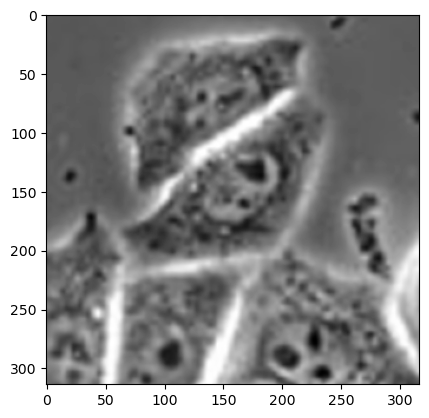

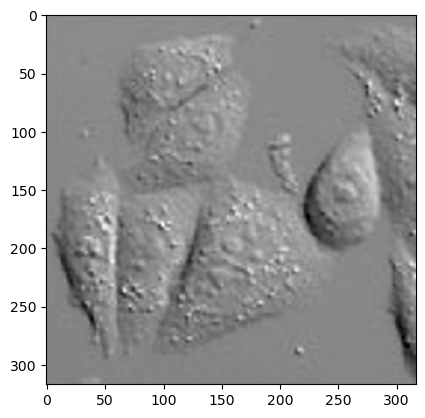

In [21]:
# Load Images
src = cv2.imread("Source.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(src, cmap='gray')
plt.show()

tgt = cv2.imread("Target.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(tgt, cmap='gray')
plt.show()

## Denote Ah = b by formulating the following linear equation systems, and solve h by pseudo-inverse

In [22]:
h_s, w_s = src.shape
h_t, w_t = tgt.shape

N = 4

m = np.min([h_s, w_s, h_t, w_t])

x = random.sample(range(m), N)
y = random.sample(range(m), N)

x = [20, 70, 210, 125]
y = [135, 95, 210, 70]

u = [45, 65, 160, 110]
v = [100, 75, 140, 55]

A = np.zeros((2*N, 8))

for i in range(0, N*2, 2):
  A[i][0] = x[i//2]
  A[i][1] = y[i//2]
  A[i][2] = 1
  A[i][6] = -x[i//2]*u[i//2]
  A[i][7] = -y[i//2]*u[i//2]
  A[i+1][3] = x[i//2]
  A[i+1][4] = y[i//2]
  A[i+1][5] = 1
  A[i+1][6] = -x[i//2]*v[i//2]
  A[i+1][7] = -y[i//2]*v[i//2]

b = np.zeros((2*N, 1))

for i in range(0, N*2, 2):
  b[i] = u[i//2]
  b[i+1] = v[i//2]

h = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
h = np.vstack((h, [[1]]))

## Solve h by eigen decomposition and singlular value decomposition

In [23]:
A_1 = np.zeros((2*N, 9))

for i in range(0, N*2, 2):
  A_1[i][0] = x[i//2]
  A_1[i][1] = y[i//2]
  A_1[i][2] = 1
  A_1[i][6] = -x[i//2]*u[i//2]
  A_1[i][7] = -y[i//2]*u[i//2]
  A_1[i][8] = -u[i//2]
  A_1[i+1][3] = x[i//2]
  A_1[i+1][4] = y[i//2]
  A_1[i+1][5] = 1
  A_1[i+1][6] = -x[i//2]*v[i//2]
  A_1[i+1][7] = -y[i//2]*v[i//2]
  A_1[i+1][8] = -v[i//2]


V, D = np.linalg.eig(np.dot(A_1.T, A_1))

sort_indices = np.argsort(V)
eigenvalues = V[sort_indices]
eigenvectors = D[:, sort_indices]

h_eig = eigenvectors[:, 0]

U2, D2, V2, = np.linalg.svd(A_1)
i = np.argmin(D2)

h_svd = -V2[i+1, :]

In [24]:
h_eig = h_eig / h_eig[-1]
h_svd = h_svd / h_svd[-1]

## Use forward warping to warp the source image to the target image coordinate using the singular value decomposition solution of h

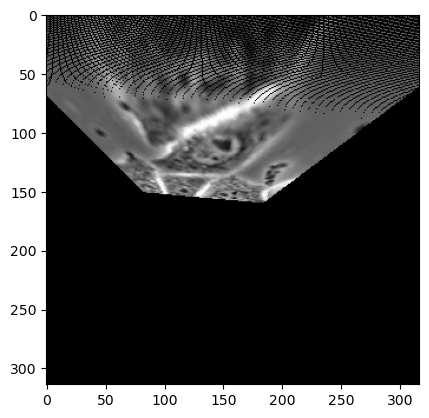

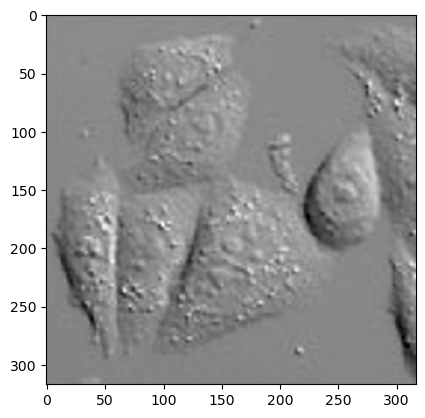

In [25]:
h_svd = h_svd.reshape((3, 3))

dest = np.zeros_like(src)


for y in range(src.shape[0]):
  for x in range(src.shape[1]):
    u, v, w = np.dot(h_svd, [x, y, 1])
    u = int(u / w)
    v = int(v / w)
  
    if u in range(dest.shape[1]) and v in range(dest.shape[0]) and x in range(src.shape[1]) and y in range(src.shape[0]):
      dest[v][u] = src[y][x]


plt.imshow(dest, cmap='gray')
plt.show()

plt.imshow(tgt, cmap='gray')
plt.show()

## Use backward warping to warp the source image to the target image coordinate using the singular value decomposition solution of h

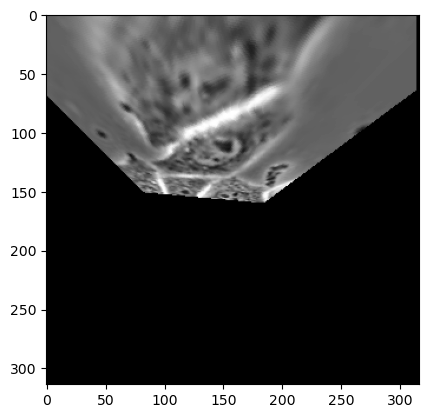

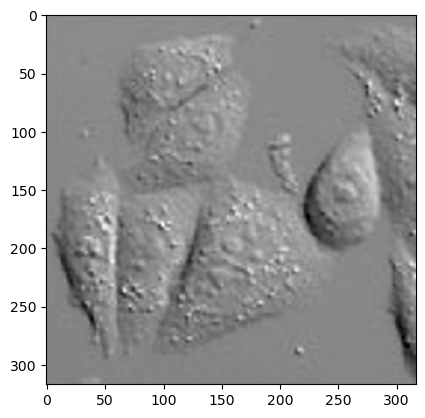

In [26]:
h_svd_i = np.linalg.inv(h_svd)

dest_1 = np.zeros_like(src)


for u in range(dest_1.shape[0]):
  for v in range(dest_1.shape[1]):
    x, y, w = np.dot(h_svd_i, [v, u, 1])
    x = int(x / w)
    y = int(y / w)
  
    if u in range(dest_1.shape[1]) and v in range(dest_1.shape[0]) and x in range(src.shape[1]) and y in range(src.shape[0]):
      dest_1[u][v] = src[y][x]

plt.imshow(dest_1, cmap='gray')
plt.show()

plt.imshow(tgt, cmap='gray')
plt.show()